In [237]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
import datetime as dt


In [238]:
#seleccionamos el dataset
dataSetRead  = pd.read_csv("covid-regresion.csv")
dataSetRead = dataSetRead.fillna(0)
dataSetRead.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,ECU,South America,Ecuador,2020-03-01,6,6,0.0,0.0,0.0,0.0,...,10581.936,3.6,140.448,5.55,2,12.3,80.635,1.5,77.01,0.759
1,ECU,South America,Ecuador,2020-03-02,6,0,0.0,0.0,0.0,0.0,...,10581.936,3.6,140.448,5.55,2,12.3,80.635,1.5,77.01,0.759
2,ECU,South America,Ecuador,2020-03-03,7,1,0.0,0.0,0.0,0.0,...,10581.936,3.6,140.448,5.55,2,12.3,80.635,1.5,77.01,0.759
3,ECU,South America,Ecuador,2020-03-04,10,3,0.0,0.0,0.0,0.0,...,10581.936,3.6,140.448,5.55,2,12.3,80.635,1.5,77.01,0.759
4,ECU,South America,Ecuador,2020-03-05,13,3,0.0,0.0,0.0,0.0,...,10581.936,3.6,140.448,5.55,2,12.3,80.635,1.5,77.01,0.759


In [ ]:
#Obtenemos la data de las fechas relacionadas
dataSetRead['date'] = pd.to_datetime(dataSetRead['date'])   
dataSetRead['date'] = (dataSetRead['date'] - dataSetRead['date'].min())  / np.timedelta64(1,'D')


In [ ]:
#Estructura para la prediccion
FinalTotalDate = dataSetRead['date'].values.reshape(-1,1)
FinalTotalCases = dataSetRead['total_cases'].values.reshape(-1,1)
rg_lineal = LinearRegression()
rg_lineal.fit(FinalTotalDate, FinalTotalCases)
prediction = rg_lineal.predict(FinalTotalCases)

# Regresion Polinomial

In [239]:
#Seleccionamos las columnas para trabajar en la grafica
X_rg_polinomial = dataSetRead['date'].values
y_rg_polinomial = dataSetRead['total_cases'].values
X_rg_polinomial = X_rg_polinomial.reshape(-1,1)

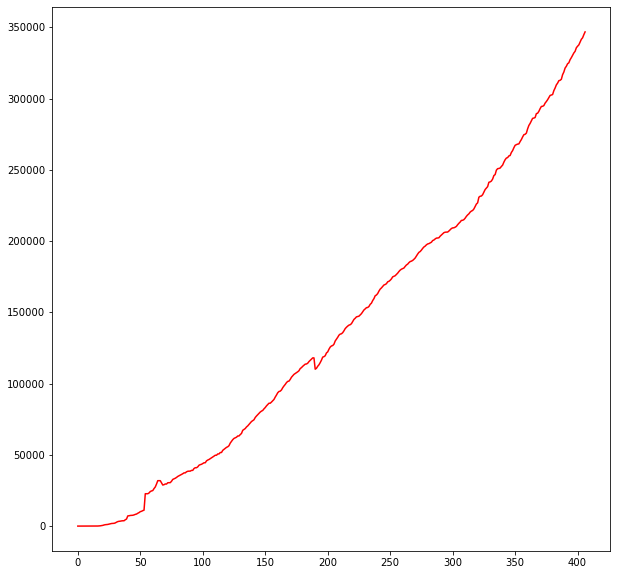

In [240]:
#Grafica 
plt.figure(figsize=(10,10))
plt.plot(X_p, y_p, color='red')
plt.show()

In [241]:
X_train_rg_polinomial, X_test_rg_polinomial, y_train_rg_polinomial, y_test_rg_polinomial = train_test_split(X_rg_polinomial, y_rg_polinomial, test_size=5)

In [242]:
#Se define el grado del polinomio
rg_polinomial = PolynomialFeatures(degree = 5)

In [243]:
#Se relaliza un modelo y entrenamiento para que las características existentes sean de mayor grado
X_train_rg_polinomial = rg_polinomial.fit_transform(X_train_p)
X_test_rg_polinomial = rg_polinomial.fit_transform(X_test_p)

rg_polinomial_model = linear_model.LinearRegression()
rg_polinomial_model.fit(X_train_rg_polinomial, y_train_p)
Y_prediction_rg_polinomial = pr.predict(X_test_rg_polinomial)


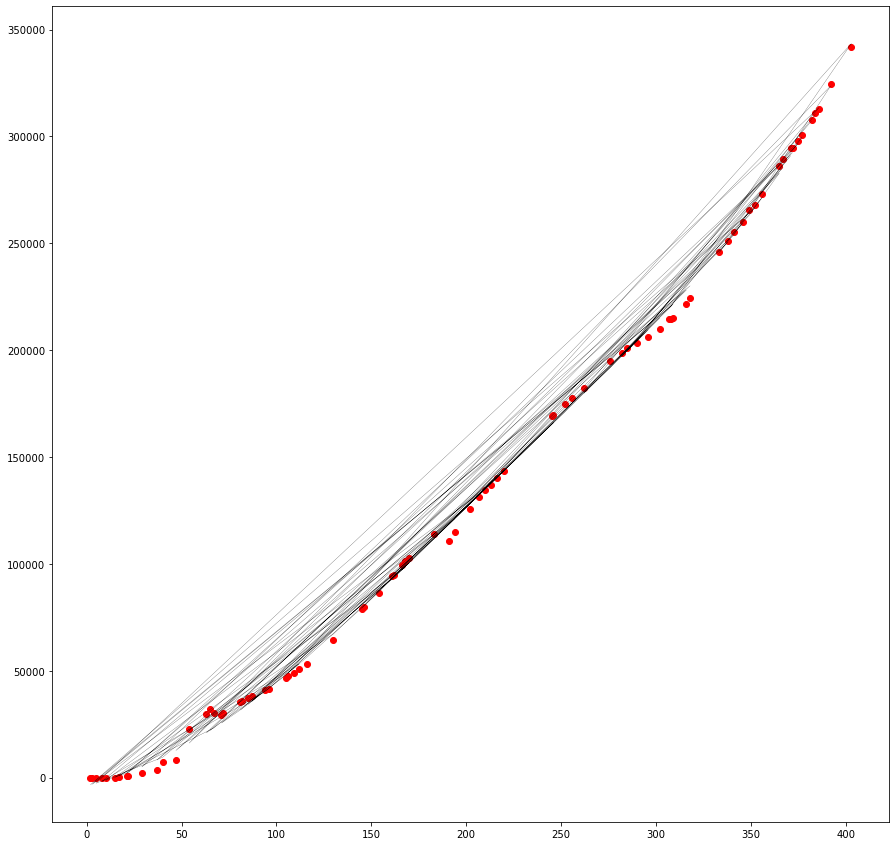

In [244]:
#Resultado obtenido
plt.figure(figsize=(15,15))
plt.scatter(X_test_p, y_test_p, color='red')
plt.plot(X_test_p, Y_prediction_rg_polinomial, color='black', linewidth=0.2)
plt.show()


In [245]:
#DATOS FINALES
print('Valor del coeficiente "a" :')
print()
print(rg_polinomial_model.coef_)
print()
print()
print('Valor del  coeficiente "b":')
print()
print(rg_polinomial_model.intercept_)
print()
print()
print('Precisión del modelo:')
print()
print(rg_polinomial_model.score(X_train_rg_polinomial, y_train_p))

Valor del coeficiente "a" :

[ 0.00000000e+00  2.25132000e+02  2.60841709e+00  3.12348831e-03
 -4.09269854e-05  6.66048066e-08]


Valor del  coeficiente "b":

-3800.8914346888487


Precisión del modelo:

0.9991072841881748


# Regresion Lineal

In [248]:
print('Valor del coeficiente "a":')
print(linear_regressor.coef_)
print()
print('Valor del coeficiente "b":')
print(linear_regressor.intercept_)

Valor del coeficiente "a":
[[848.29342989]]

Valor del coeficiente "b":
[-34499.5613528]


In [250]:
m = linear_regressor.coef_[0][0]
c = linear_regressor.intercept_[0]
dias=500
label = m*dias-c
print("Despues de ",dias," días, la preccion resultante es : ",label)

Despues de  500  días, la preccion resultante es :  458646.2762956575


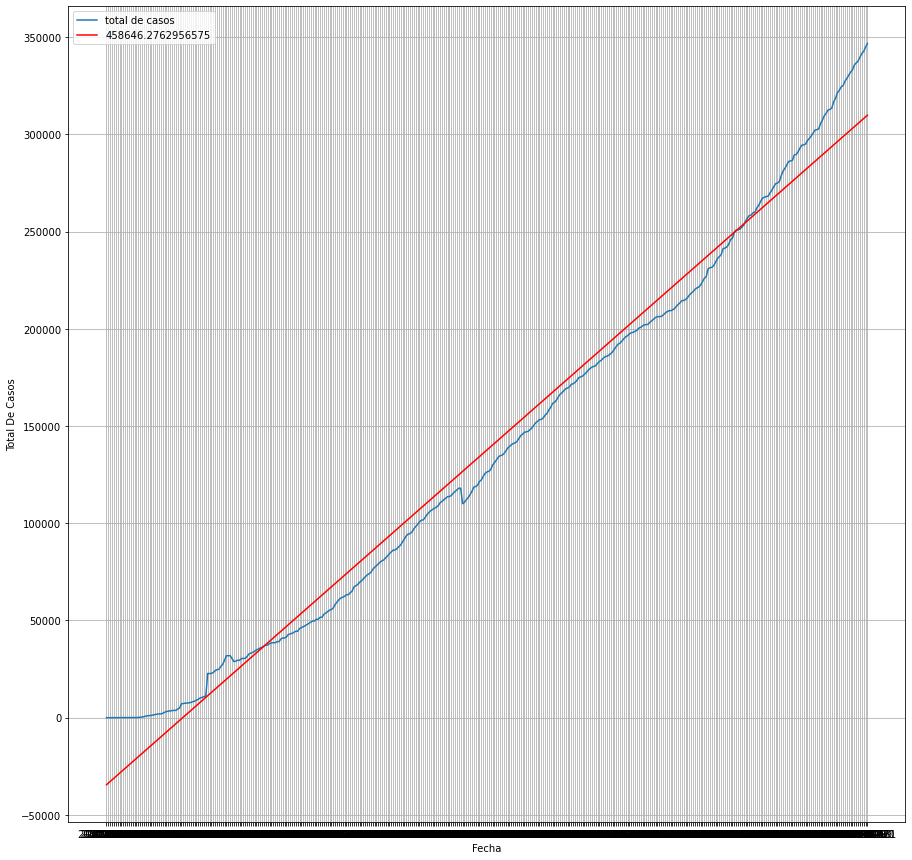

In [255]:
fig = plt.figure(figsize=(15,15))
plt.plot(dataSetRead['date'],dataSetRead['total_cases'], label='total de casos')
plt.plot(totaldate, date_predicted, color='red', label=label)
plt.xlabel('Fecha')
plt.ylabel('Total De Casos')
plt.legend()
plt.grid()

In [258]:
m = linear_regressor.coef_[0][0]
c = linear_regressor.intercept_[0]
dias=1000
label = m*dias-c
print("Despues de ",dias," días, la preccion resultante es : ",label)

Despues de  1000  días, la preccion resultante es :  882792.9912385184


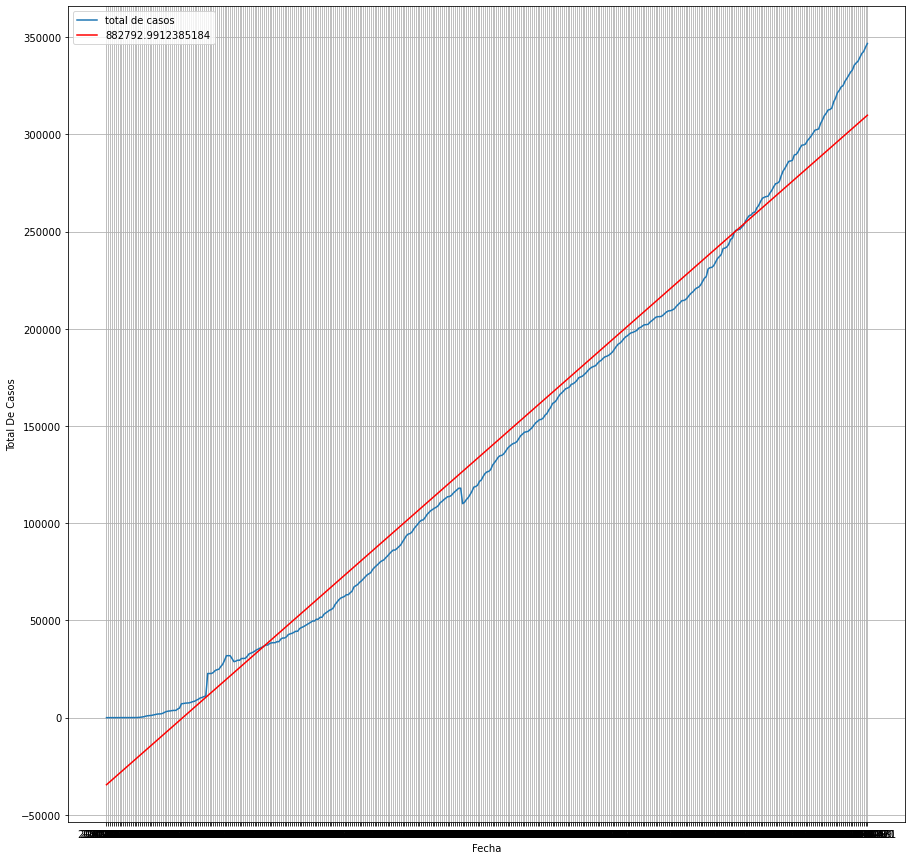

In [259]:
fig = plt.figure(figsize=(15,15))
plt.plot(dataSetRead['date'],dataSetRead['total_cases'], label='total de casos')
plt.plot(totaldate, date_predicted, color='red', label=label)
plt.xlabel('Fecha')
plt.ylabel('Total De Casos')
plt.legend()
plt.grid()

In [260]:
m = linear_regressor.coef_[0][0]
c = linear_regressor.intercept_[0]
dias=1000
label = m*dias-c
print("Despues de ",dias," días, la preccion resultante es : ",label)

Despues de  1000  días, la preccion resultante es :  882792.9912385184


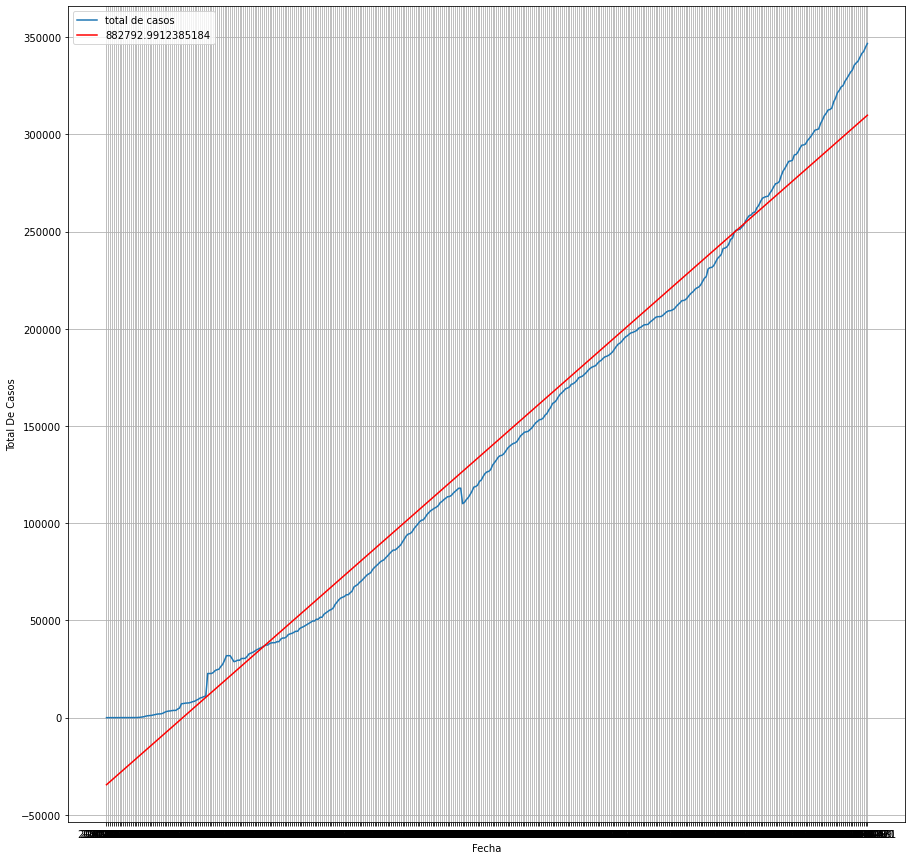

In [261]:
fig = plt.figure(figsize=(15,15))
plt.plot(dataSetRead['date'],dataSetRead['total_cases'], label='total de casos')
plt.plot(totaldate, date_predicted, color='red', label=label)
plt.xlabel('Fecha')
plt.ylabel('Total De Casos')
plt.legend()
plt.grid()

In [262]:
m = linear_regressor.coef_[0][0]
c = linear_regressor.intercept_[0]
dias=1500
label = m*dias-c
print("Despues de ",dias," días, la preccion resultante es : ",label)

Despues de  1500  días, la preccion resultante es :  1306939.7061813793


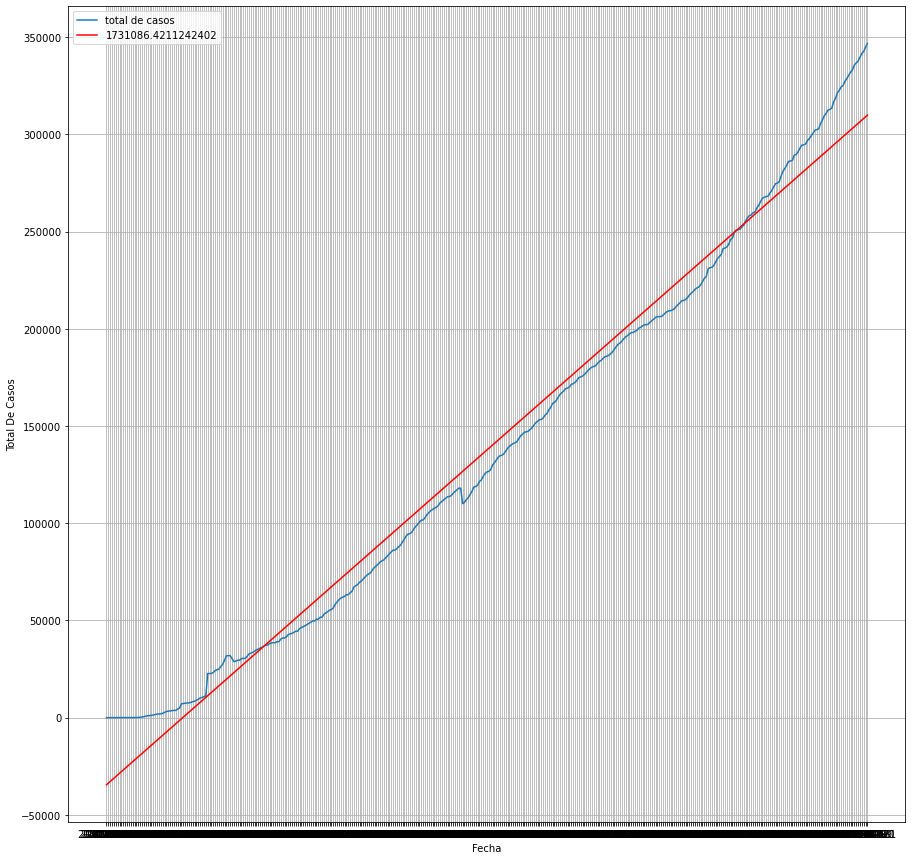

In [264]:
fig = plt.figure(figsize=(15,15))
plt.plot(dataSetRead['date'],dataSetRead['total_cases'], label='total de casos')
plt.plot(totaldate, date_predicted, color='red', label=label)
plt.xlabel('Fecha')
plt.ylabel('Total De Casos')
plt.legend()
plt.grid()

In [263]:
m = linear_regressor.coef_[0][0]
c = linear_regressor.intercept_[0]
dias=2000
label = m*dias-c
print("Despues de ",dias," días, la preccion resultante es : ",label)

Despues de  2000  días, la preccion resultante es :  1731086.4211242402


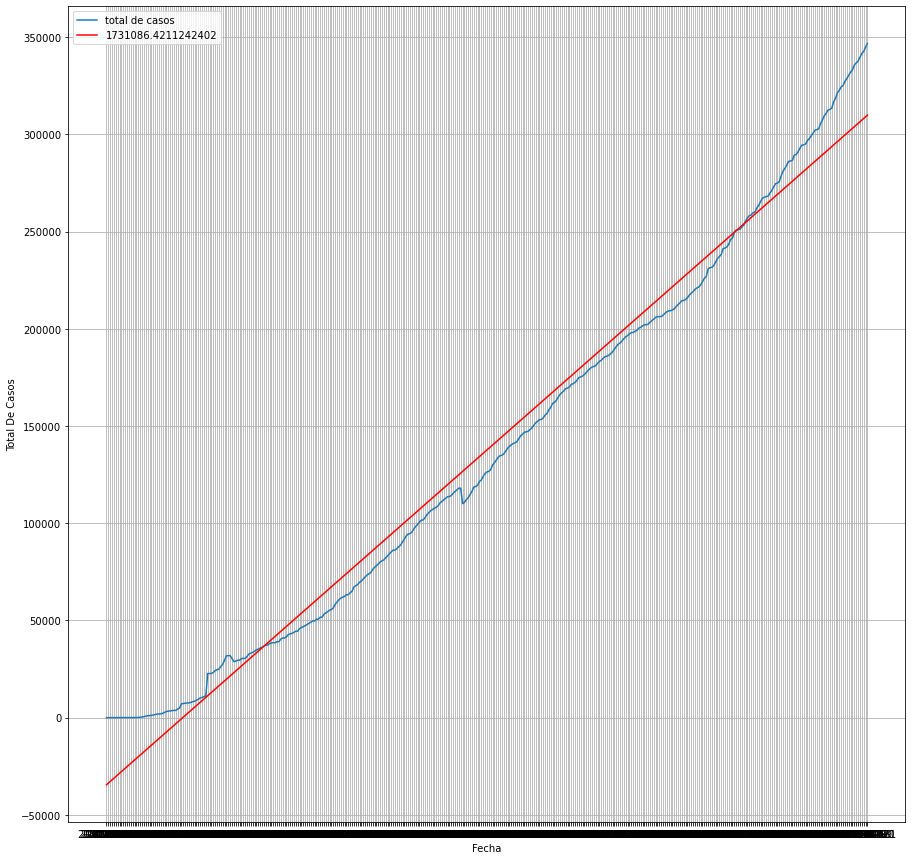

In [265]:
fig = plt.figure(figsize=(15,15))
plt.plot(dataSetRead['date'],dataSetRead['total_cases'], label='total de casos')
plt.plot(totaldate, date_predicted, color='red', label=label)
plt.xlabel('Fecha')
plt.ylabel('Total De Casos')
plt.legend()
plt.grid()